# Hermite's methode for finding polinomial interpolation


In [42]:
from math import cos, pi
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [12,8]

## Distribution of n values in between a and b


### Even distribution of points

In [43]:
def even(n, a, b):
    n -= 1
    d = (b - a) / n
    result = [0] * (n + 1)
    result[0] = a
    result[n] = b
    for i in range(1, n):
        result[i] = result[i - 1] + d
    return result

### Chebyshev nodes

In [44]:
def chebyshev(n, a, b):
    result = [0] * n
    for i in range(n):
        result[i] = (a + b) / 2 + ((b - a) / 2) * cos((2 * i + 1) * pi / (2 * n))
    return result

## Methode of finding interpolation

In [45]:
def hermite(X, Y, Yd):
    n = 2*len(X)

    def diff():
        quotients = [[None] * (n) for i in range(n)]
        quotients[0][0]=Y[0]
        def curr(i, j):
            if quotients[i][j] is not None:
                pass
            elif i == j:
                quotients[i][j] = Y[i//2]
            elif i % 2 == 0 and j == i+1:
                quotients[i][j] = Yd[i//2]
            else:
                f2 = curr(i + 1, j)
                f1 = curr(i, j - 1)
                quotients[i][j] = (f2 - f1) / (X[j//2] - X[i//2])
            return quotients[i][j]

        curr(0, n - 1)
        return quotients

    Q = diff()

    def f(x):
        result = 0
        for i in range(n - 1, 0, -1):
            result += Q[0][i]
            result *= (x - X[(i - 1)//2])
        result += Q[0][0]
        return result

    return f

## Mapping an array of values x to an array of f(x)

In [46]:
def function_to_points(X, f): return [f(X[i]) for i in range(len(X))]

## Two methodes of comparing values in a function

### Finding the largest difference

In [47]:
def f_compare_max(Y1,Y2):
    diff = np.abs(Y1 - Y2)
    return np.max(diff)

### Summation of sqared difference of function value for each x in the scope

In [48]:
def f_compare_sqr(Y1,Y2):
    diff = np.square(Y1 - Y2)
    return np.sum(diff)

## Plot generation

In [49]:
def plot(X,Y,f1,f2,a,b):
    X2 = np.linspace(a,b,2000)
    Y1 = f1(X2)
    Y2 = f2(X2)
    plt.plot(X2,Y1,'g')
    plt.plot(X2, Y2, 'b')
    plt.scatter(X,Y,c='r',s=15,marker = 'o')
    plt.show()

## The problem

In [50]:
a,b = -2*pi,pi
def f(x): return np.exp(-3*np.sin(3*x))
def fd(x): return -9*np.cos(3*x)*np.exp(-3*np.sin(3*x))
X = np.linspace(a,b,2000)
Y = f(X)
Yd = fd(X)


## Evaluating for 4 nodes

In [75]:
n=4

In [76]:
xc = np.array(chebyshev(n, a, b))
yc = f(xc)
ydc = fd(xc)

# even distribution
xe = np.array(even(n, a, b))
ye = f(xe)
yde = fd(xe)


fch = hermite(xc, yc, ydc)
feh = hermite(xe, ye, yde)

### Chebyshev's nodes

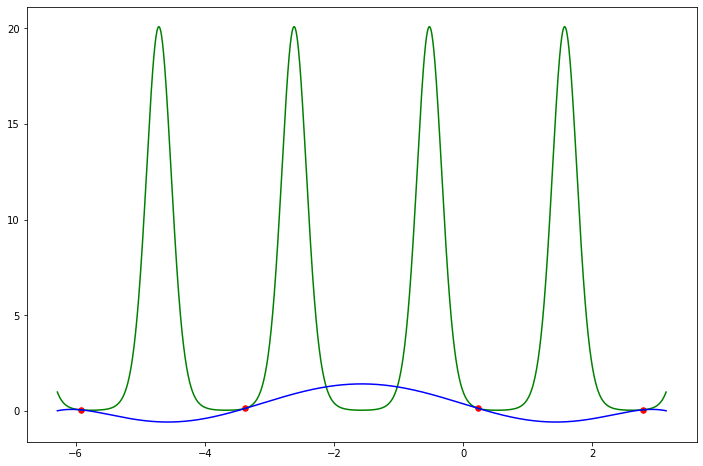

In [77]:
Yc = fch(X)
c_max, c_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

### Even distribution

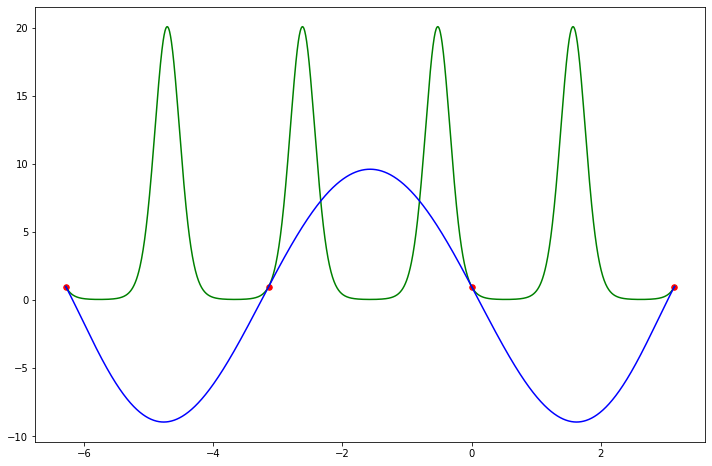

In [78]:
Ye = feh(X)
e_max, e_sqr = f_compare_max(Y,Ye), f_compare_sqr(Y,Ye)


plt.plot(X,Y,'g')
plt.plot(X, Ye, 'b')
plt.scatter(xe,ye,c='r',s=30,marker = 'o')

plt.show()

In [79]:
print("c largest difference:   ",round(c_max,2))
print("e largest difference:   ",round(e_max,2))
print("c largest sqr sum:      ",round(c_sqr,2))
print("e largest sqr sum:      ",round(e_sqr,2))

c largest difference:    20.64
e largest difference:    29.03
c largest sqr sum:       117298.56
e largest sqr sum:       231705.66


## Evaluating for 8 nodes

In [55]:
n=8

In [56]:
xc = np.array(chebyshev(n, a, b))
yc = f(xc)
ydc = fd(xc)

# even distribution
xe = np.array(even(n, a, b))
ye = f(xe)
yde = fd(xe)


fch = hermite(xc, yc, ydc)
feh = hermite(xe, ye, yde)

### Chebyshev's nodes

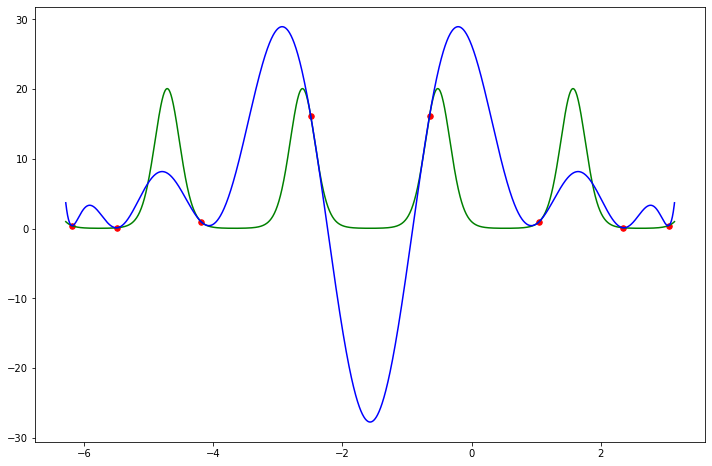

In [57]:
Yc = fch(X)
cl_max, cl_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

### Even distribution

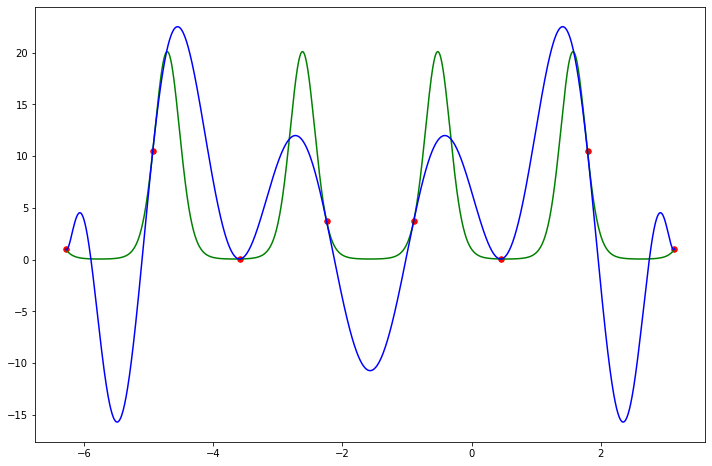

In [58]:
Ye = feh(X)
fmax, fsqr = f_compare_max(Y,Ye), f_compare_sqr(Y,Ye)


plt.plot(X,Y,'g')
plt.plot(X, Ye, 'b')
plt.scatter(xe,ye,c='r',s=30,marker = 'o')

plt.show()

In [79]:
print("c largest difference:   ",round(c_max,2))
print("e largest difference:   ",round(e_max,2))
print("c largest sqr sum:      ",round(c_sqr,2))
print("e largest sqr sum:      ",round(e_sqr,2))

c largest difference:    20.64
e largest difference:    29.03
c largest sqr sum:       117298.56
e largest sqr sum:       231705.66


## Evaluating for 12 nodes

In [59]:
n=12

In [60]:
xc = np.array(chebyshev(n, a, b))
yc = f(xc)
ydc = fd(xc)

# even distribution
xe = np.array(even(n, a, b))
ye = f(xe)
yde = fd(xe)


fch = hermite(xc, yc, ydc)
feh = hermite(xe, ye, yde)

### Chebyshev's nodes

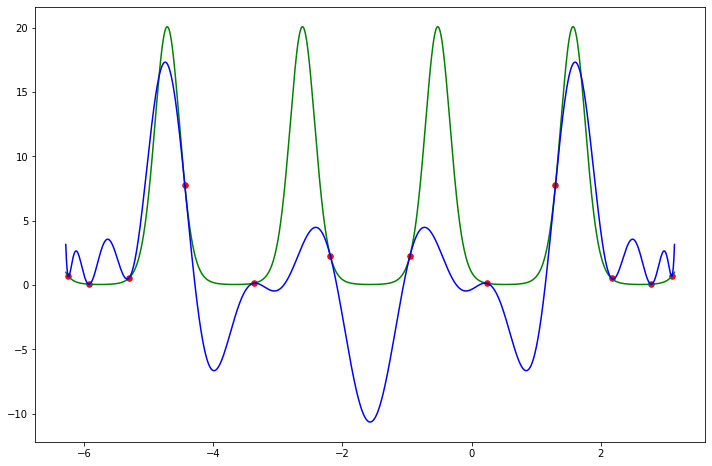

In [61]:
Yc = fch(X)
cl_max, cl_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

### Even distribution

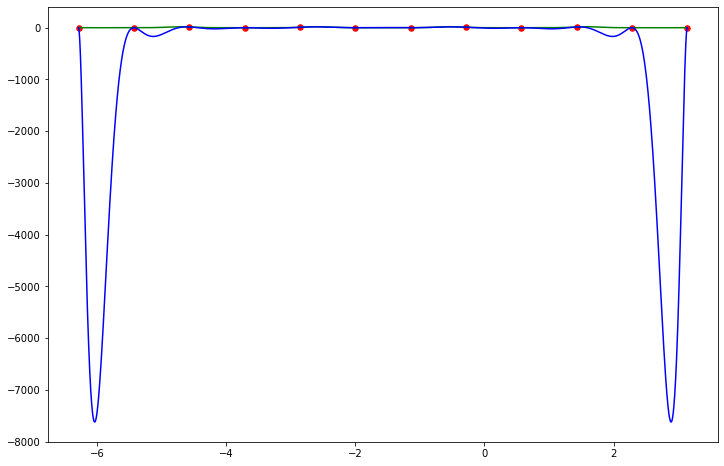

In [62]:
Ye = feh(X)
fmax, fsqr = f_compare_max(Y,Ye), f_compare_sqr(Y,Ye)


plt.plot(X,Y,'g')
plt.plot(X, Ye, 'b')
plt.scatter(xe,ye,c='r',s=30,marker = 'o')

plt.show()

In [79]:
print("c largest difference:   ",round(c_max,2))
print("e largest difference:   ",round(e_max,2))
print("c largest sqr sum:      ",round(c_sqr,2))
print("e largest sqr sum:      ",round(e_sqr,2))

c largest difference:    20.64
e largest difference:    29.03
c largest sqr sum:       117298.56
e largest sqr sum:       231705.66


## Evaluating for 16 nodes

In [71]:
n=16

In [72]:
xc = np.array(chebyshev(n, a, b))
yc = f(xc)
ydc = fd(xc)

# even distribution
xe = np.array(even(n, a, b))
ye = f(xe)
yde = fd(xe)


fch = hermite(xc, yc, ydc)
feh = hermite(xe, ye, yde)

### Chebyshev's nodes

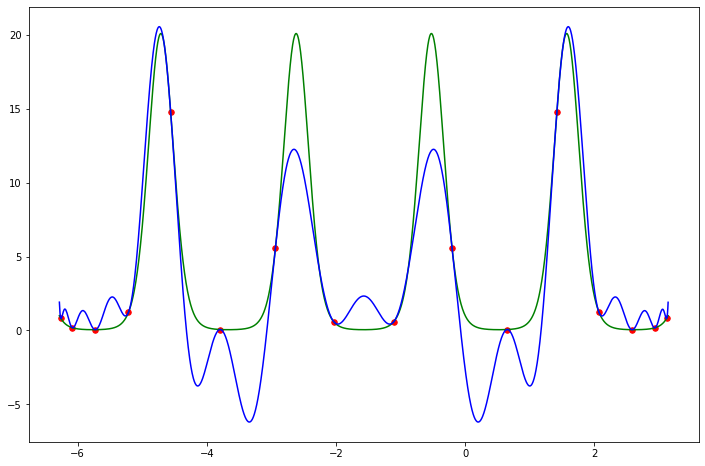

In [73]:
Yc = fch(X)
cl_max, cl_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

### Even distribution

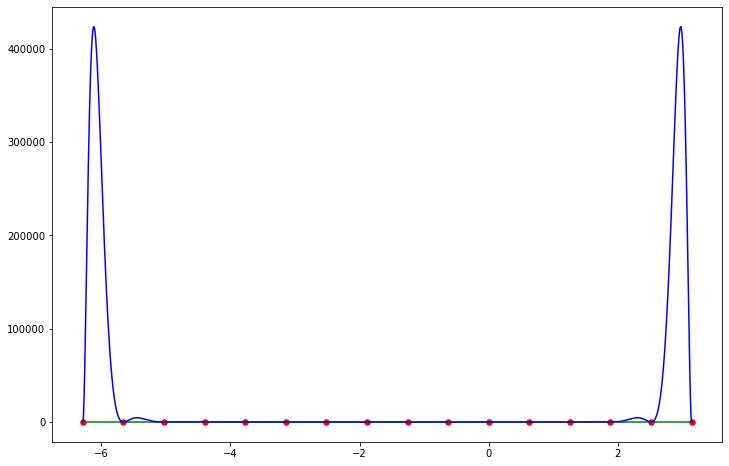

In [74]:
Ye = feh(X)
fmax, fsqr = f_compare_max(Y,Ye), f_compare_sqr(Y,Ye)


plt.plot(X,Y,'g')
plt.plot(X, Ye, 'b')
plt.scatter(xe,ye,c='r',s=30,marker = 'o')

plt.show()

In [79]:
print("c largest difference:   ",round(c_max,2))
print("e largest difference:   ",round(e_max,2))
print("c largest sqr sum:      ",round(c_sqr,2))
print("e largest sqr sum:      ",round(e_sqr,2))

c largest difference:    20.64
e largest difference:    29.03
c largest sqr sum:       117298.56
e largest sqr sum:       231705.66
